# 3. Multi Label Classification

### 3.1

In [1]:
import os
from PIL import Image
import numpy as np

def load_mnist_data(base_path):
    data = {'train': [], 'val': [], 'test': []}
    labels = {'train': [], 'val': [], 'test': []}
    
    # Loop over each data split
    for split in ['train', 'val', 'test']:
        split_path = os.path.normpath(os.path.join(base_path, split))  # Normalize the path
        print(f"Checking path: {split_path}")  # Debugging line
        
        # Check if split_path exists
        if not os.path.exists(split_path):
            print(f"Path does not exist: {split_path}")
            continue  # Skip to the next split if this path does not exist

        # Loop over each label folder within the split directory
        for label_folder in os.listdir(split_path):
            label_path = os.path.join(split_path, label_folder)
            
            # Check if the path is a directory
            if os.path.isdir(label_path):
                # Get the digits in the folder name and create a one-hot encoding
                digits = [int(digit) for digit in label_folder if digit.isdigit()]
                
                # Create a one-hot encoded vector for the digits
                one_hot_label = np.zeros(10)  # Assuming digits 0-9
                for digit in digits:
                    one_hot_label[digit] = 1
                
                # Load each image in the folder
                for img_name in os.listdir(label_path):
                    img_path = os.path.join(label_path, img_name)
                    
                    # Open image, load data, then close immediately
                    with Image.open(img_path) as img:
                        data[split].append(np.array(img.copy()))  # Use img.copy() to load data into memory
                    labels[split].append(one_hot_label)

    return data, labels

# Example usage
base_path = './../../data/external/double_mnist'
data, labels = load_mnist_data(base_path) # PIL format, one-hot encoded labels

# Accessing train data
train_images = data['train']
train_labels = labels['train']
val_images = data['val']
val_labels = labels['val']
test_images = data['test']
test_labels = labels['test']

Checking path: ..\..\data\external\double_mnist\train
Checking path: ..\..\data\external\double_mnist\val
Checking path: ..\..\data\external\double_mnist\test


In [2]:
print(train_labels)

[array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 0., 0., 

In [3]:
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import torch

class MultiMNISTDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        """
        Args:
            images (list): List of images (NumPy arrays).
            labels (list): List of one-hot encoded labels.
            transform (callable, optional): Optional transform to apply on an image.
        """
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        """Returns the total number of images."""
        return len(self.images)

    def __getitem__(self, idx):
        """Loads an image and its label, applies any specified transformation."""
        img = self.images[idx]  # This is a NumPy array
        label = self.labels[idx]
        
        # Convert NumPy array to PyTorch tensor
        img = torch.tensor(img, dtype=torch.float32) / 255.0  # Normalize to [0, 1]
        img = img.unsqueeze(0)  # Add channel dimension for (1, H, W)

        label = torch.tensor(label, dtype=torch.float32)  # One-hot encoded label as tensor
        
        if self.transform:
            img = self.transform(img)

        return img, label

# Function to create dataloaders
def create_dataloaders(data, labels, batch_size=32):
    loaders = {}
    for split in ['train', 'val', 'test']:
        dataset = MultiMNISTDataset(data[split], labels[split])
        loaders[split] = DataLoader(dataset, batch_size=batch_size, shuffle=(split == 'train'))  # Shuffle only for train set
    return loaders

# Example usage
# Assuming load_mnist_data() has been implemented to load and organize data as per assignment requirements
base_path = './../../data/external/double_mnist'
data, labels = load_mnist_data(base_path)

# Create dataloaders for each split
dataloaders = create_dataloaders(data, labels, batch_size=64)

# Access train loader
train_loader = dataloaders['train']
val_loader = dataloaders['val']
test_loader = dataloaders['test']

# Check the loaders
print(train_loader)
print(len(train_loader))

Checking path: ..\..\data\external\double_mnist\train
Checking path: ..\..\data\external\double_mnist\val
Checking path: ..\..\data\external\double_mnist\test
197


### 3.2

In [4]:
# implemented class
import os
os.chdir('C:/Users/Pavan/Desktop/smai-m24-assignments-codepk37/smai-m24-assignments-codepk37')

from models.cnn.multilabel_cnn import MultiLabelCNN,train_model,predict

model = MultiLabelCNN( num_classes=10, num_conv_layers=5, dropout_rate=0.4)

# Train the model
train_model(model, train_loader, val_loader=val_loader, 
                                        num_epochs=2, optimizer='adam', 
                                        learning_rate=0.001)

predictions= predict(model,val_loader)

Epoch [1/2], Training Loss: 0.4916
Epoch [1/2], Validation Loss: 0.4726
Epoch [2/2], Training Loss: 0.4729
Epoch [2/2], Validation Loss: 0.4779


In [5]:
print(predictions)

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32), array([0, 0

### 3.

1. Reason for Activation Function After Last Layer
Purpose of Activation: For each label, we want the model to output a probability score between 0 and 1, representing the likelihood of that label (digit) being present in the image.
Sigmoid for Multi-Label Output: Unlike single-label classification, where softmax is often used to make mutually exclusive predictions, multi-label classification doesn’t assume that classes are exclusive. Instead, each label can be independently present or absent. Therefore, a sigmoid activation function is appropriate, as it applies independently to each output node, producing probabilities for each label.
Why Not Softmax: Softmax normalizes the outputs across all classes, forcing them to sum to 1, which is appropriate for single-label classification but not for multi-label classification, where labels aren’t mutually exclusive.
2. Answer: Yes, Sigmoid Activation is Required
Justification: Applying a sigmoid function after the final linear layer will provide independent probabilities for each digit in the sequence. This allows the model to predict multiple digits simultaneously, assigning each digit a probability of presence without influencing others. Thus, the output can better represent multiple labels accurately and independently.

###  3.3 Hyperparameter Tuning

In [6]:
dropout_rate = [0.2, 0.5]
num_conv_layers = [2, 3, 4]
optimizer = ['adam', 'sgd', 'rmsprop']
learning_rate = [0.001, 0.01]

In [7]:
import numpy as np

def calculate_accuracy(predictions, true_labels, threshold=0.5): #exact match accuracy
    """
    Calculate accuracy for multi-label classification.

    Args:
        predictions (np.ndarray): Predicted probabilities for each class (shape: [n_samples, n_classes]).
        true_labels (np.ndarray): Ground truth binary labels for each class (shape: [n_samples, n_classes]).
        threshold (float): Probability threshold to convert predictions to binary (default: 0.5).

    Returns:
        float: Accuracy as a ratio of correct predictions to total samples.
    """
    # Binarize predictions based on the threshold
    if isinstance(predictions, list):
        predictions = np.array(predictions)
        true_labels = np.array(true_labels)
    predicted_labels = (predictions >= threshold).astype(int)

    # Calculate the number of correct predictions
    correct_predictions = np.sum(np.all(predicted_labels == true_labels, axis=1))

    # Calculate total number of samples
    total_samples = true_labels.shape[0]

    # Calculate accuracy
    accuracy = correct_predictions / total_samples if total_samples > 0 else 0.0
    return accuracy


In [14]:
import os
os.chdir('C:/Users/Pavan/Desktop/smai-m24-assignments-codepk37/smai-m24-assignments-codepk37')
import itertools
import matplotlib.pyplot as plt
from models.cnn.multilabel_cnn import MultiLabelCNN,train_model,predict

dropout_rates = [0.2, 0.5]
num_conv_layers = [ 3, 5]
optimizers = ['adam',  'rmsprop']
learning_rates = [0.001, 0.01]


# Prepare to collect loss and evaluation data
loss_data = {}
evaluation_metrics = {}

for dropout_rate in dropout_rates:
    for num_layers in num_conv_layers:
        for optimizer in optimizers:
            for learning_rate in learning_rates:
                # Initialize the model
                model = MultiLabelCNN(num_classes=10, num_conv_layers=num_layers, dropout_rate=dropout_rate)
                
                # Train the model
                train_losses, val_losses = train_model(model, train_loader, val_loader=val_loader, 
                                                        num_epochs=5, optimizer=optimizer, 
                                                        learning_rate=learning_rate)

                # Store the losses with a unique key for each combination
                key = f"{dropout_rate}_{num_layers}_{optimizer}_{learning_rate}"
                loss_data[key] = (train_losses, val_losses)

                # Get predictions and ground truth values
                predictions = predict(model, val_loader)
                true_labels = []
                for _, labels in val_loader:
                    true_labels.extend(labels.cpu().numpy().astype(np.int64))
                
                # Calculate accuracy
                accuracy = calculate_accuracy(predictions, true_labels)
                evaluation_metrics[key] = {'accuracy': accuracy}



Epoch [1/5], Training Loss: 0.4873
Epoch [1/5], Validation Loss: 0.4731
Epoch [2/5], Training Loss: 0.4691
Epoch [2/5], Validation Loss: 0.4729
Epoch [3/5], Training Loss: 0.4473
Epoch [3/5], Validation Loss: 0.4744
Epoch [4/5], Training Loss: 0.4086
Epoch [4/5], Validation Loss: 0.4200
Epoch [5/5], Training Loss: 0.3592
Epoch [5/5], Validation Loss: 0.3704
Epoch [1/5], Training Loss: 0.6131
Epoch [1/5], Validation Loss: 0.4910
Epoch [2/5], Training Loss: 0.4860
Epoch [2/5], Validation Loss: 0.4885
Epoch [3/5], Training Loss: 0.4907
Epoch [3/5], Validation Loss: 0.4890
Epoch [4/5], Training Loss: 0.4854
Epoch [4/5], Validation Loss: 0.4911
Epoch [5/5], Training Loss: 0.4847
Epoch [5/5], Validation Loss: 0.4898
Epoch [1/5], Training Loss: 0.5664
Epoch [1/5], Validation Loss: 0.4841
Epoch [2/5], Training Loss: 0.4744
Epoch [2/5], Validation Loss: 0.4715
Epoch [3/5], Training Loss: 0.4595
Epoch [3/5], Validation Loss: 0.4799
Epoch [4/5], Training Loss: 0.4379
Epoch [4/5], Validation Loss:

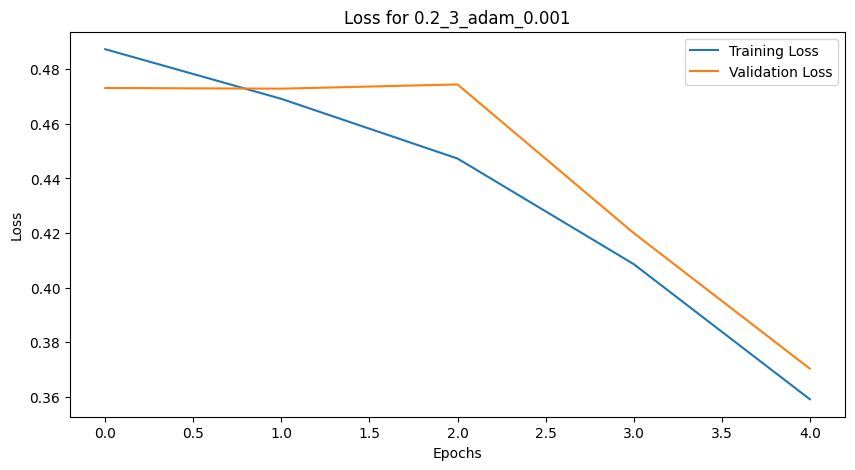

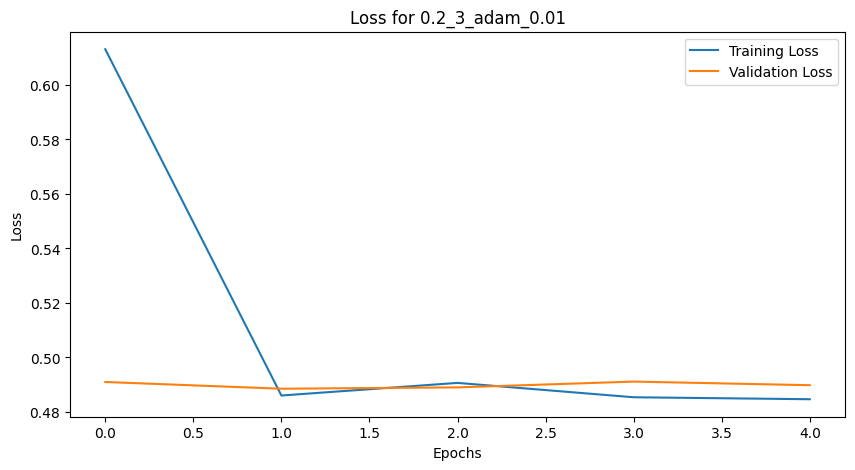

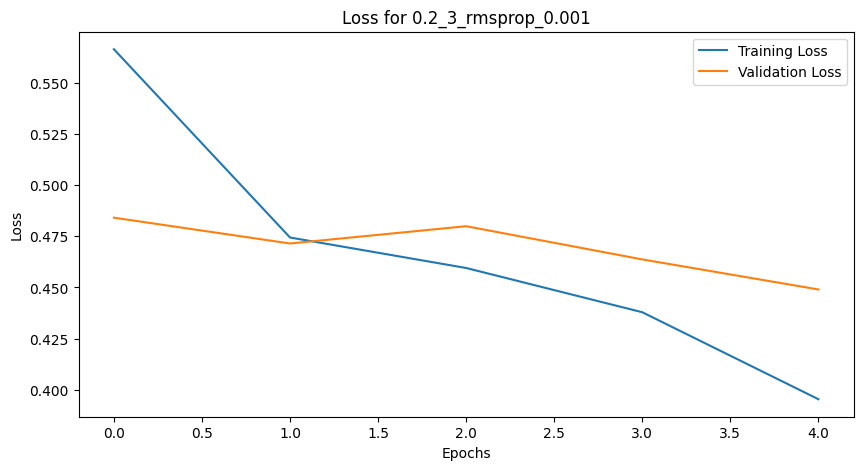

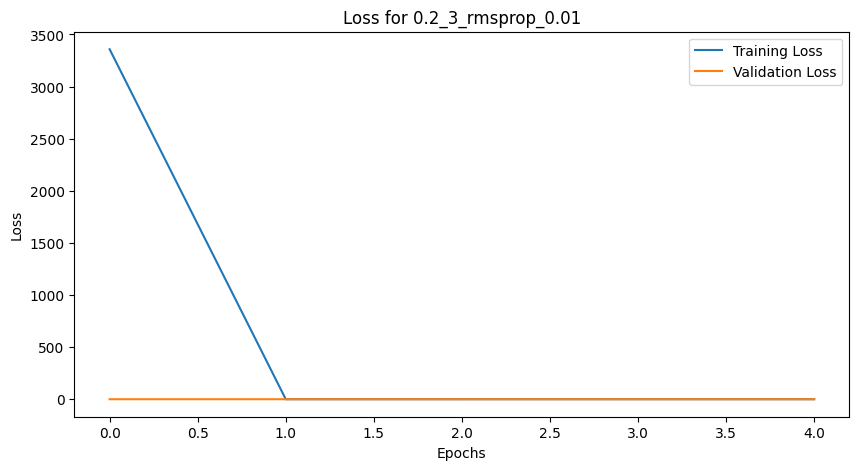

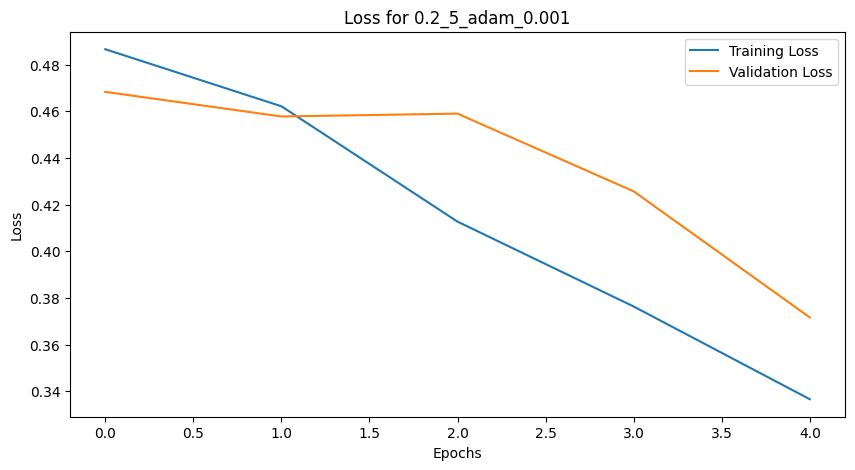

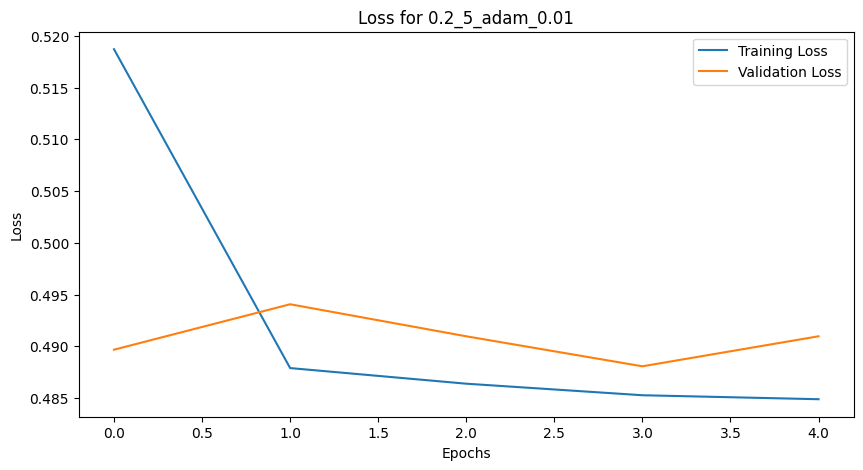

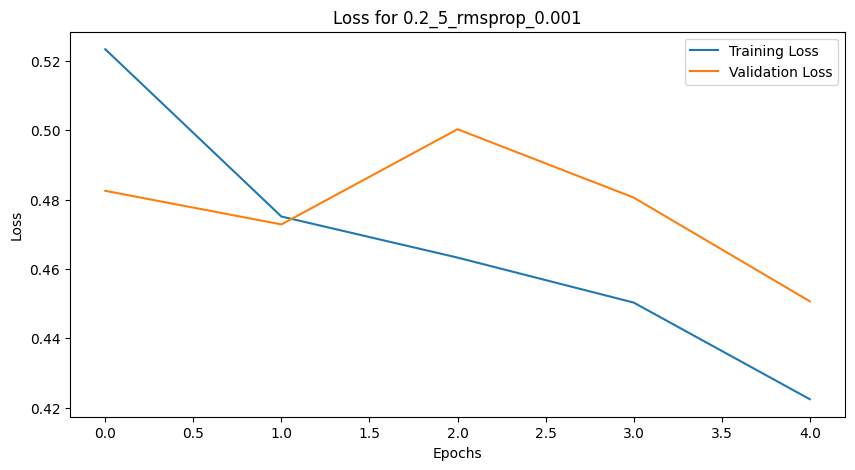

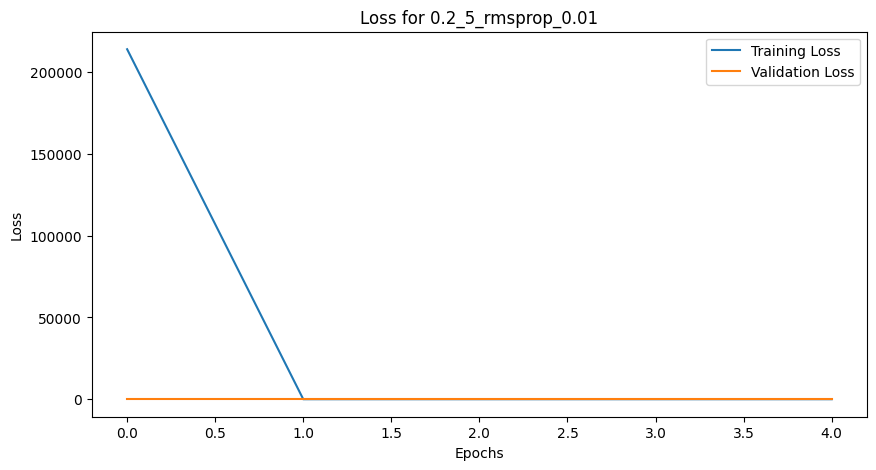

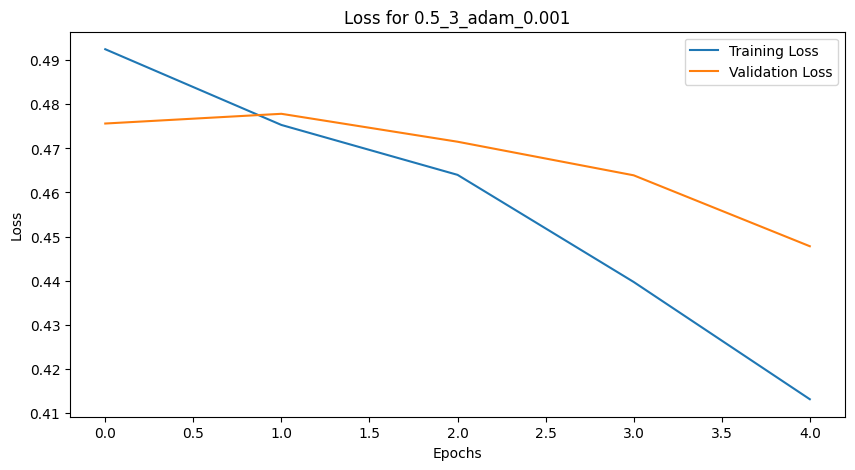

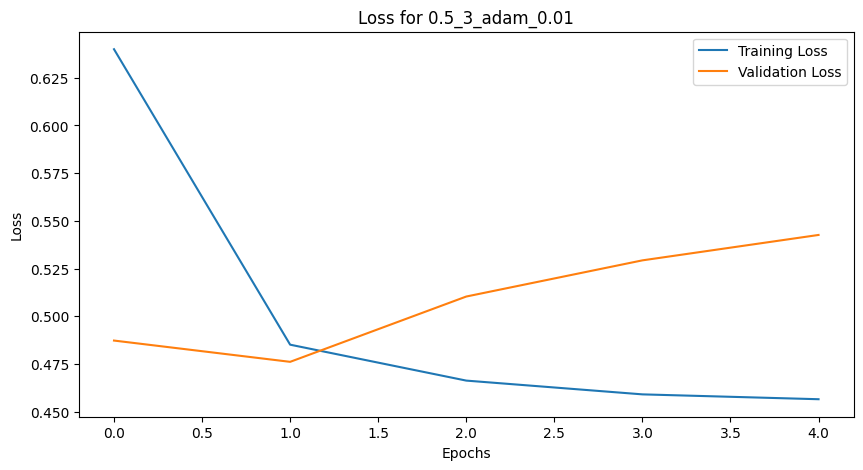

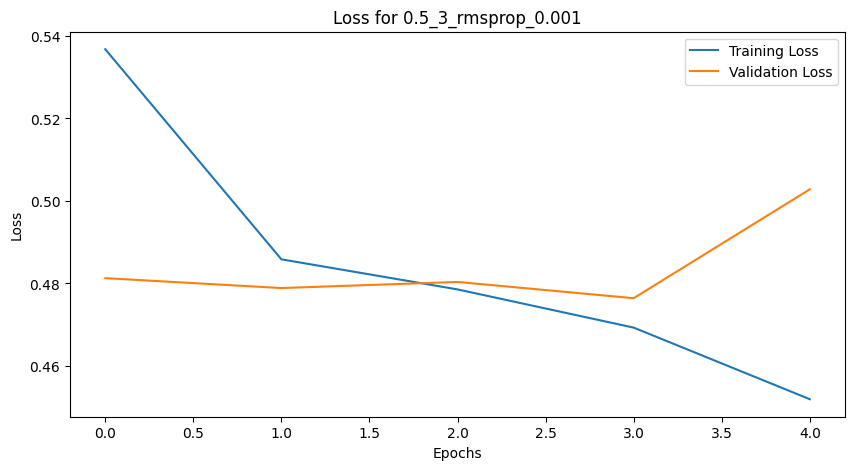

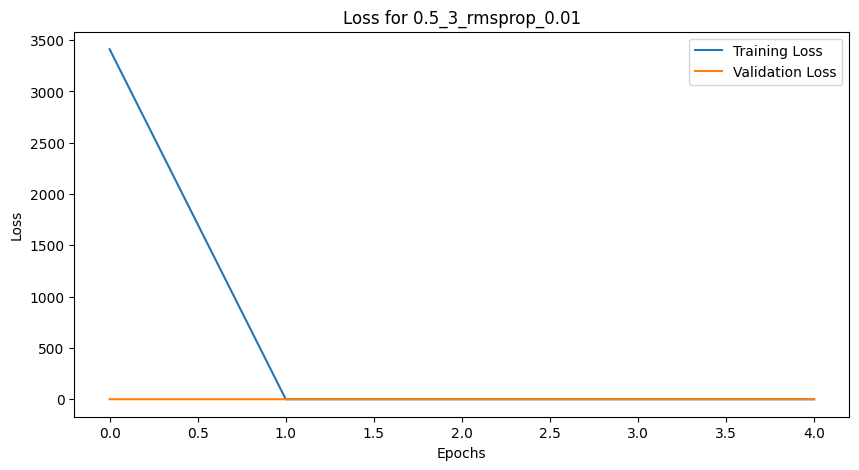

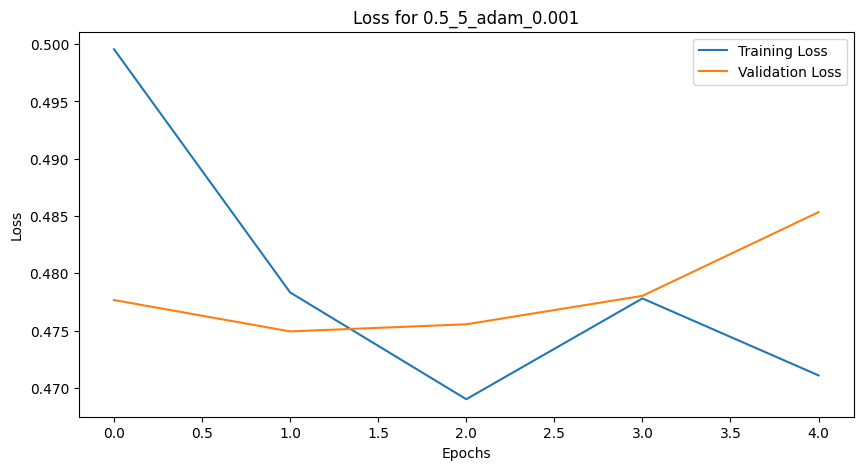

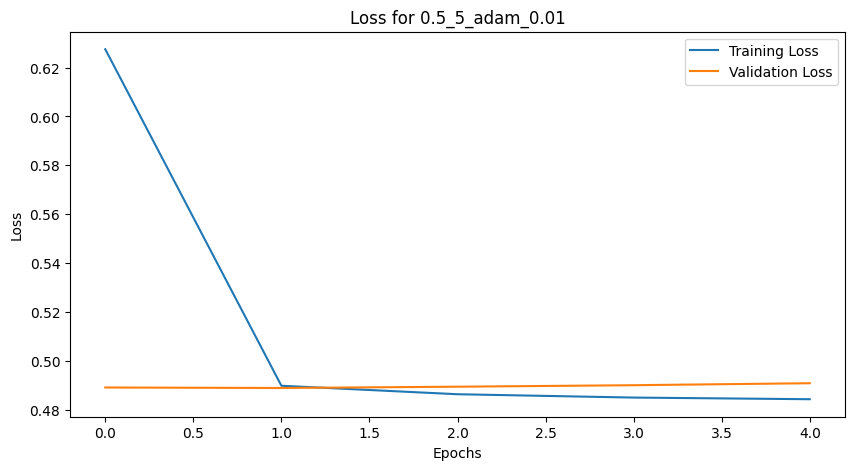

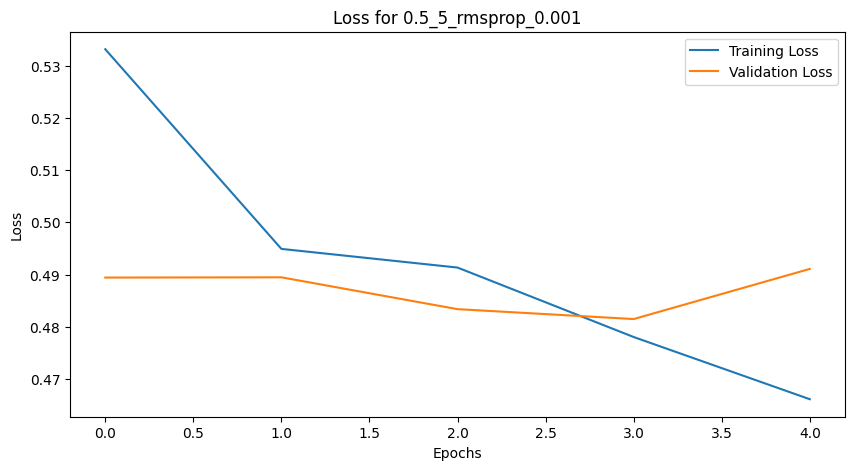

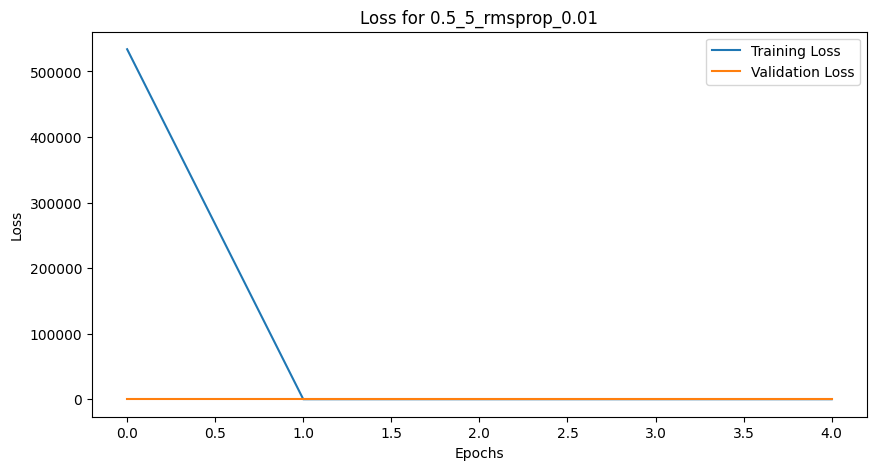

In [16]:

for key, (train_losses, val_losses) in loss_data.items():
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title(f'Loss for {key}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show() # Save each plot
    plt.close()


#### Best model is 

In [17]:

# Identify the best-performing model
best_model_key = max(evaluation_metrics, key=lambda k: evaluation_metrics[k]['accuracy'])
best_accuracy = evaluation_metrics[best_model_key]['accuracy']
print(f"Best Model Key: {best_model_key} with Accuracy: {best_accuracy:.4f}")


Best Model Key: 0.2_5_adam_0.001 with Accuracy: 0.1647


### 3.

In [24]:


def calculate_hamming_accuracy(predictions, true_labels, threshold=0.5):

    if isinstance(predictions, list):
        predictions = np.array(predictions)
        true_labels = np.array(true_labels)

    # Binarize predictions based on the threshold
    predicted_labels = (predictions >= threshold).astype(int)

    # Calculate the Hamming accuracy
    hamming_accuracy = np.mean(np.equal(predicted_labels, true_labels).mean(axis=1))
    return hamming_accuracy

In [26]:
import os
os.chdir('C:/Users/Pavan/Desktop/smai-m24-assignments-codepk37/smai-m24-assignments-codepk37')

from models.cnn.multilabel_cnn import MultiLabelCNN,train_model,predict

model = MultiLabelCNN( num_classes=10, num_conv_layers=5, dropout_rate=0.2)
train_model(model, train_loader, val_loader=val_loader, 
                                        num_epochs=10, optimizer='adam', 
                                        learning_rate=0.001)



train_predictions = predict(model, train_loader)  # Get predictions for training data
val_predictions = predict(model, val_loader)      # Get predictions for validation data
test_predictions = predict(model, test_loader)    # Get predictions for test data

# Collect true labels for each dataset
train_true_labels = []
for _, labels in train_loader:
    train_true_labels.extend(labels.cpu().numpy())
train_true_labels = np.array(train_true_labels)

val_true_labels = []
for _, labels in val_loader:
    val_true_labels.extend(labels.cpu().numpy())
val_true_labels = np.array(val_true_labels)

test_true_labels = []
for _, labels in test_loader:
    test_true_labels.extend(labels.cpu().numpy())
test_true_labels = np.array(test_true_labels)

# Calculate exact match and Hamming accuracies
results = {
    "train": {
        "exact_match_accuracy": calculate_accuracy(train_predictions, train_true_labels),
        "hamming_accuracy": calculate_hamming_accuracy(train_predictions, train_true_labels),
    },
    "val": {
        "exact_match_accuracy": calculate_accuracy(val_predictions, val_true_labels),
        "hamming_accuracy": calculate_hamming_accuracy(val_predictions, val_true_labels),
    },
    "test": {
        "exact_match_accuracy": calculate_accuracy(test_predictions, test_true_labels),
        "hamming_accuracy": calculate_hamming_accuracy(test_predictions, test_true_labels),
    },
}

# Print the results
for dataset, metrics in results.items():
    print(f"{dataset.capitalize()} Set Metrics:")
    print(f"  Exact Match Accuracy: {metrics['exact_match_accuracy']:.4f}")
    print(f"  Hamming Accuracy: {metrics['hamming_accuracy']:.4f}")

Epoch [1/10], Training Loss: 0.4868
Epoch [1/10], Validation Loss: 0.4736
Epoch [2/10], Training Loss: 0.4636
Epoch [2/10], Validation Loss: 0.4774
Epoch [3/10], Training Loss: 0.4412
Epoch [3/10], Validation Loss: 0.5438
Epoch [4/10], Training Loss: 0.4015
Epoch [4/10], Validation Loss: 0.4525
Epoch [5/10], Training Loss: 0.3578
Epoch [5/10], Validation Loss: 0.4291
Epoch [6/10], Training Loss: 0.3191
Epoch [6/10], Validation Loss: 0.4194
Epoch [7/10], Training Loss: 0.2876
Epoch [7/10], Validation Loss: 0.4108
Epoch [8/10], Training Loss: 0.2610
Epoch [8/10], Validation Loss: 0.4062
Epoch [9/10], Training Loss: 0.2361
Epoch [9/10], Validation Loss: 0.3947
Epoch [10/10], Training Loss: 0.2093
Epoch [10/10], Validation Loss: 0.3906
Train Set Metrics:
  Exact Match Accuracy: 0.0251
  Hamming Accuracy: 0.7130
Val Set Metrics:
  Exact Match Accuracy: 0.1357
  Hamming Accuracy: 0.8416
Test Set Metrics:
  Exact Match Accuracy: 0.1070
  Hamming Accuracy: 0.8346
